# M1.D5: Electronic energy of molecules

## Learning Objectives

* Use Cartesian coordinates to specify the geometry of a diatomic molecule.
* Run "single point" energy calculations of diatomic molecules using the pyscf package. 
* Run "restricted/closed shell" and "unrestricted/open shell" calculations. 
* Compare the energy of the singlet and triplet electronic state for the diatomic molecules of oxygen and nitrogen 
* Given bond distances and bond angles, use internal coordinates to specify the geometry of water.
* Compare the homolytic and heterolytic bond breaking of H2.

# Electronic energy of molecules


So far we have solved the following quantum systems:

* Particle in box: 1 particle's kinetic energy, no potential. The solution was analytical (a function).
* Hydrogen atom: 2 particle's kinetic energy, one attractive potential between the two. The solution albeit more complicated was still analytical.
* Polyelectronic atoms: many particle's kinetic energy (independent of each other), atttactive potential and an extra electron-electron repulsion. The solution was not analytical and had to be solved computationally.

Now we want to know how to solve molecules or groups of atoms interacting with each other. As usual the hamiltonian is the sum of kinetic and potential energy

$$
\hat{H} = \text{Kinetic Energy} + \text{Potential Energy}
$$

For molecules in atomic units:

$$
\hat{H} = \sum_{k=nuclei}-\frac{1}{2m_k}\nabla_{k} -\frac{1}{2}\sum_{i=elec} \nabla_i + \sum_{k=nuclei}\sum_{i=elec} \frac{q_{i}q_{k}}{r_{ik}} + \sum_{i,j=elec} \frac{q_{i}q_{j}}{r_{ij}} + \sum_{k,l=nuc}\frac{q_{k}{q_{l}}}{r_{kl}}
$$

Translated into English we have:

$$
\hat{H} = \sum\text{Kinetic of nucleus} + \sum{\text{Kinetic of e-}} + \sum{\text{attraction of elec-nucl}} + \sum{\text{Repulsion elec-elect}} + \sum{\text{repulsion between nuclei}}
$$

## The Born-Oppenheimer approximation and potential energy surface

"Let us define a molecule by a geometry structure determined by the nuclear positions. If the nuclei have fixed positions, the nuclear kinetic term vanishes and the nuclear repulsion term becomes a constant. The Hamiltonian expression of equation has a shortened form that we label as electronic Hamiltonian"

$$
\hat{H}_{elec} = -\frac{1}{2}\sum_{i=elec} \nabla_i + \sum_{k=nuclei}\sum_{i=elec} \frac{q_{i}q_{k}}{r_{ik}} + \sum_{i,j=elec} \frac{q_{i}q_{j}}{r_{ij}}
$$

So we can define the electronic energy $E_{elec}$ of a molecule as the eigenvalues of the electronic Hamiltonian

$$
\hat{H}_{elec}\Psi_{elec} = E_{elec}\Psi_{elec} 
$$

Without going into much detail it can be shown that the motion of the nuclei is mostly decoupled from the motion of the electrons, so we can imagine that the nuclei are moving on a single electronic state surface, the most common one being the ground electronic state. This surface is called the potential energy surface and the approximation that led us here is called the Born-Oppenheimer approximation.

<img src="https://upload.wikimedia.org/wikipedia/commons/8/81/Potential_Energy_Surface_and_Corresponding_Reaction_Coordinate_Diagram.png" width="500" />

# Single point energy of molecules

The calculation below is the "single point" energy calculation of H2. 
The output is saved in the file 'h2_sp.txt'. Open it and try to rationalize the information in it.

In [ ]:
from pyscf import gto

molh2 = gto.M(
    atom = 'H 0 0 0; H 0 0 0.53',  # in Angstrom
    basis = '6-31g',
    symmetry = True,
    charge=0, 
    spin=0,
    verbose=4,
    output='m1d5_h2_sp.out')  

h2 = molh2.RHF().run() #RHF Restricted Hartree-Fock. All electrons are paired

print(h2.e_tot)

overwrite output file: m1d5_h2_sp.out
-1.0790270257473757


* Why did we use rhf and not uhf?
* The geometry is introduced using cartesian coordinates (xyz). What is the bond distance in this case?

Let's calculate the energy of the molecule of water. Notice the alternative way to give the geometry. These are called internal coordinates and they are convenient to introduce bond distances and angles.

In [8]:
#entering the geometry with internal coordinates
molh2o = gto.M(
    atom = '''
    O
    H    1  0.96
    H    1  0.96 2 104.5
    ''',
    basis = '6-31g*',
    symmetry = True,
    charge=0, 
    spin=0,
    verbose=4,
    output='m1d5_h2o_sp.out'
)
h2o = molh2o.RHF().run()
print(h2o.e_tot)

overwrite output file: m1d5_h2o_sp.out
-76.00900934217299


## Assessing the energy of different spin states 

We cannot always foresee the most stable spin. If we want to calculate the energy of the molecule of oxygen, by drawing the Lewis structure we would see that all electrons are paired, therefore we would expect that the ground state is a singlet.

**Let's compare the energy for the singlet and triplet of N2 and O2**

In [14]:
molo2_singlet = gto.M(
    atom = 'O 0 0 0; O 0 0 1.2',  # in Angstrom
    basis = '6-31g',
    symmetry = True,
    charge=0, 
    spin=0,
    verbose=3,
    output='m1d5_o2_1.out')  

o2_singlet = molo2_singlet.RHF().run() #RHF Restricted Hartree-Fock. All electrons are paired
o2_singlet.analyze()

molo2_triplet = gto.M(
    atom = 'O 0 0 0; O 0 0 1.2',  # in Angstrom
    basis = '6-31g',
    symmetry = True,
    charge=0, 
    spin=2, #two unpaired electrons
    verbose=3,
    output='m1d5_o2_3.out')  

o2_triplet = molo2_triplet.UHF().run() #UHF Unrestricted Hartree-Fock. Two unpaired electrons
o2_triplet.analyze()

print(o2_singlet.e_tot)
print(o2_triplet.e_tot)

overwrite output file: m1d5_o2_1.out
overwrite output file: m1d5_o2_3.out
-149.4533513245776
-149.54579333299034


In [13]:
moln2_singlet = gto.M(
    atom = 'N 0 0 0; N 0 0 1.1',  # in Angstrom
    basis = '6-31g',
    symmetry = True,
    charge=0, 
    spin=0,
    verbose=3,
    output='m1d5_n2_1.out')  

n2_singlet = moln2_singlet.RHF().run() #RHF Restricted Hartree-Fock. All electrons are paired
n2_singlet.analyze()

moln2_triplet = gto.M(
    atom = 'N 0 0 0; N 0 0 1.1',  # in Angstrom
    basis = '6-31g',
    symmetry = True,
    charge=0, 
    spin=2, #two unpaired electrons
    verbose=3,
    output='m1d5_n2_3.out')  

n2_triplet = moln2_triplet.UHF().run() #UHF Unrestricted Hartree-Fock. Two unpaired electrons
n2_triplet.analyze()

print(n2_singlet.e_tot)
print(n2_triplet.e_tot)

overwrite output file: m1d5_n2_1.out
overwrite output file: m1d5_n2_3.out
-108.86761837305848
-108.59455017417186


* What spin state is most stable for N2 and O2? Compare it with their Lewis structures and assess if the Lewis structures can be used to predict the electronic stability.
* Look at the orbital energies of the output to explain this phenomenon. In the case of O2, the molecules has 16 electrons. Check the "Orbital Energies" and fill them up with 16 electrons.

## Population analysis

Partial charges are not really a quantum property because the electrons are not constrained to one atom. Rather, the square of the wavefunction extents over all space. That being said, there are methods to decide on what atom the electrons are most probable to be found.

Below we can calculate the charges according using the Mulliken method.

In [ ]:
molCO = gto.M(
    atom = 'C 0 0 0; O 0 0 1.4',  # in Angstrom
    basis = '6-31g',
    symmetry = True,
    charge=0, 
    spin=0,
    verbose=4,
    output='m1d5_co_sp.out')  

co = molCO.RHF().run() #RHF Restricted Hartree-Fock. All electrons are paired
co.analyze()

overwrite output file: m1d5_co_sp.out


((array([1.99999186e+00, 1.73393973e+00, 1.17103529e-02, 4.46250338e-04,
         4.13382584e-01, 4.13382584e-01, 1.01917143e+00, 2.29978258e-04,
         2.29978258e-04, 1.11210209e-02, 2.19064334e-07, 2.19064334e-07,
         4.58726884e-05, 9.82468610e-35, 4.68933508e-03, 7.18710213e-03,
         4.68933508e-03, 2.25139348e-33, 1.99999328e+00, 1.79866648e+00,
         4.66845337e-03, 9.99958974e-05, 1.57936995e+00, 1.57936995e+00,
         1.40799362e+00, 4.82202347e-04, 4.82202347e-04, 1.44029039e-03,
         4.04889972e-04, 4.04889972e-04, 9.93620981e-05, 3.78733935e-34,
         1.44084349e-03, 3.42491238e-03, 1.44084349e-03, 9.88197247e-33]),
  array([ 0.37978216, -0.37978216])),
 array([ 0.        ,  0.        , -1.67449812]))

* Open the output file m1d5_co_sp.out. At the bottom of the file we added the dipole and Mulliken charges. What is the charge on C and O in the molecule of CO? Does it match with its Lewis structure?
* Charges depend a lot on the size of the basis set and the level of theory. You could try to redo the above calculation with b3lyp/6-311G** and see if the charges are the same.

Notice though that we do not know whether or not the geometry we introduced so far is the actual bond distance. At different geometries we may obtain different results.

# Scanning a distance to find bond distance

We want to produce a binding energy curve for the $H_2$ molecule using different levels of theory. The binding energy is given by:

 $$E_{bind} = E(H_2) - 2E(H)  \tag{1} $$

Or if we build the binding curve, the binding energy would be the energy difference between the bottom of the well and the energy at which the H-H bond is infinitely apart.

In [38]:
from scipy import constants

hartree_value = 1  # Value in Hartree
electronvolt_value = hartree_value * constants.physical_constants["Hartree energy in eV"][0]


In [ ]:
myGeom = 'H 0 0 0; H 0 0 mydist'  #using mydist as a string to replace in the loop by the actual distance
myoutput = 'm1d5_h2_scanmydist.out'

def runThisDist(mydist,method):
    molh2 = gto.M(
        atom = myGeom.replace('mydist',str(mydist)), #str: need to convert float to string
        basis = '6-31g',
        symmetry = True,
        charge=0, 
        spin=0,
        verbose=2,
        output=myoutput.replace('mydist',str(mydist)+method))  
    if method == "UHF": 
        h2 = molh2.UHF().run()
    elif method == "RHF":
        h2 = molh2.RHF().run()
    else:
        print("Wrong method")
    return(h2.e_tot*electronvolt_value)

distances = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]
#the distance array can be done with np.linspace(0.3,2.0,18)
listEne = []
for r in distances:
    print(r)
    listEne.append( runThisDist(r,"UHF"))


0.3
overwrite output file: m1d5_h2_scan0.3UHF.out
0.4
overwrite output file: m1d5_h2_scan0.4UHF.out
0.5
overwrite output file: m1d5_h2_scan0.5UHF.out
0.6
overwrite output file: m1d5_h2_scan0.6UHF.out
0.7
overwrite output file: m1d5_h2_scan0.7UHF.out
0.8
overwrite output file: m1d5_h2_scan0.8UHF.out
0.9
overwrite output file: m1d5_h2_scan0.9UHF.out
1.0
overwrite output file: m1d5_h2_scan1.0UHF.out
1.1
overwrite output file: m1d5_h2_scan1.1UHF.out
1.2
overwrite output file: m1d5_h2_scan1.2UHF.out
1.3
overwrite output file: m1d5_h2_scan1.3UHF.out
1.4
overwrite output file: m1d5_h2_scan1.4UHF.out
1.5
overwrite output file: m1d5_h2_scan1.5UHF.out
1.6
overwrite output file: m1d5_h2_scan1.6UHF.out
1.7
overwrite output file: m1d5_h2_scan1.7UHF.out
1.8
overwrite output file: m1d5_h2_scan1.8UHF.out
1.9
overwrite output file: m1d5_h2_scan1.9UHF.out
2.0
overwrite output file: m1d5_h2_scan2.0UHF.out


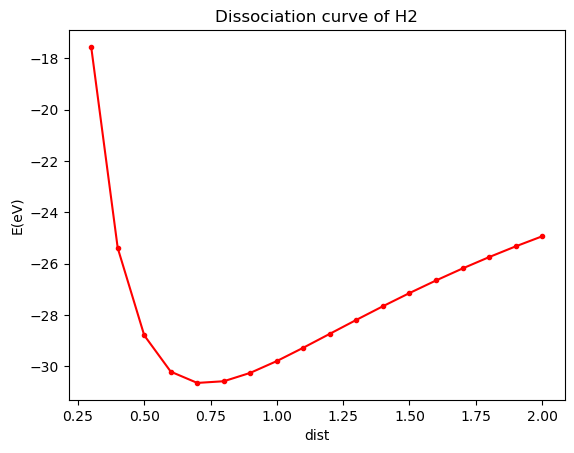

In [82]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
#the x axis is the atomic number

ax.plot(distances,listEne,'.r-')
ax.set_xlabel("dist")
ax.set_ylabel("E(eV)")
ax.set_title("Dissociation curve of H2");

* Your turn: Build the bonding curve for H2(+) and H2(-).
* Plot these curves.

## Homolytic and heterolytic breaking of a bond

One can break a bond homolitically, that is, each atom keeps one electron so that at the end you have two unpaired electrons (triplet) and both atoms remain neutral. Or you can break it heterolitically, so that one atom keeps both electrons and no electrons are unpaired. In gas phase (without solvent) the homolytical bond breaking takes less energy.

The plot shown above was an homolytical breaking because we allowed the electrons to be separated. If we run the same H2 curve just using RHF we will obtain the heterolytical breaking.

In [75]:
listEneRHF = []
#using the same distances array defined above
for r in distances:
    print(r)
    listEneRHF.append(runThisDist(r,"RHF"))

0.3
overwrite output file: m1d5_h2_scan0.3RHF.out
0.4
overwrite output file: m1d5_h2_scan0.4RHF.out
0.5
overwrite output file: m1d5_h2_scan0.5RHF.out
0.6
overwrite output file: m1d5_h2_scan0.6RHF.out
0.7
overwrite output file: m1d5_h2_scan0.7RHF.out
0.8
overwrite output file: m1d5_h2_scan0.8RHF.out
0.9
overwrite output file: m1d5_h2_scan0.9RHF.out
1.0
overwrite output file: m1d5_h2_scan1.0RHF.out
1.1
overwrite output file: m1d5_h2_scan1.1RHF.out
1.2
overwrite output file: m1d5_h2_scan1.2RHF.out
1.3
overwrite output file: m1d5_h2_scan1.3RHF.out
1.4
overwrite output file: m1d5_h2_scan1.4RHF.out
1.5
overwrite output file: m1d5_h2_scan1.5RHF.out
1.6
overwrite output file: m1d5_h2_scan1.6RHF.out
1.7
overwrite output file: m1d5_h2_scan1.7RHF.out
1.8
overwrite output file: m1d5_h2_scan1.8RHF.out
1.9
overwrite output file: m1d5_h2_scan1.9RHF.out
2.0
overwrite output file: m1d5_h2_scan2.0RHF.out


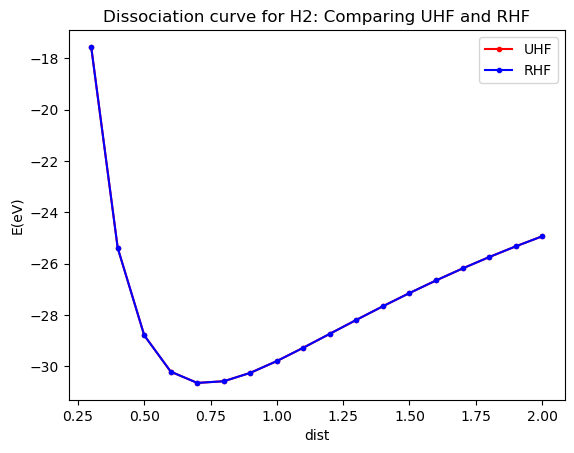

In [83]:
fig, ax = plt.subplots()
#the x axis is the atomic number

ax.plot(distances,listEne,'.r-',label="UHF")
ax.plot(distances,listEneRHF,'.b-',label="RHF")
ax.set_xlabel("dist")
ax.set_ylabel("E(eV)")
ax.set_title("Dissociation curve for H2: Comparing UHF and RHF")
ax.legend();
#if you see the two curves showing the same energy at dissoviactions it means that the UHF method has not converged into the lower unpaired singlet. 
# Need to perturb the guess density matrix in that case

# Structure optimization

A faster way to find the minimum of energy in the potential energy surface is by using an optimization algorithm. These algorithms will use the first derivative of the energy (the gradient) to move towards the minimum. It is an iterative process and it requires a threshold of gradient and energy for the computer to know when the minimum is found.

In [15]:
psi4.core.clean()
h2_geo = psi4.geometry("""
H 0.0 0.0 0.0 
H 0.0 0.0 0.6

units angstrom
""")

psi4.core.set_output_file('h2_opt.txt', False)
psi4.set_options({'reference': 'rhf'})
psi4.optimize('scf/6-31G**', molecule=h2_geo)

Optimizer: Optimization complete!


-1.1313348258320226

Your turn
* Open the h2_opt.txt file and see the bond distance at which the algorithm has optimized the structure. Compare it with out previous scan.
* What is the criteria for gradient and energy to decide when convergence is achieved?
* Look at the code, what is the first loop doing? And the second?

In [23]:
myOutput = open('h2_opt.txt','r').readlines()
for line in myOutput:
    if 'Total Energy =' in line:
        print(line)
for i in range(len(myOutput)):
    if 'Step     Total Energy' in myOutput[i]:
        print("**Optimization step")
        print(myOutput[i])
        print(myOutput[i+1])
        print(myOutput[i+2])
        print(myOutput[i+3])
        print(myOutput[i+4])
        i = i + 4
    i = i + 1
        

    Total Energy =                         -1.1139361721990531

    Total Energy =                         -1.1312540898766401

    Total Energy =                         -1.1313243629427232

    Total Energy =                         -1.1313334462445632

    Total Energy =                         -1.1313348258320226

**Optimization step
   Step     Total Energy     Delta E     MAX Force     RMS Force      MAX Disp      RMS Disp    ~

  --------------------------------------------------------------------------------------------- ~

    Convergence Criteria    1.00e-06 *    3.00e-04 *             o    1.20e-03 *             o  ~

  --------------------------------------------------------------------------------------------- ~

      1      -1.11393617   -1.11e+00      1.62e-01      1.62e-01 o    2.31e-01      2.31e-01 o  ~

**Optimization step
   Step     Total Energy     Delta E     MAX Force     RMS Force      MAX Disp      RMS Disp   

  ----------------------------------------------

## Optimization of the molecule of water

In [3]:
psi4.core.clean()
psi4.core.set_output_file('h2o_opt.txt', False)
h2o = psi4.geometry("""
0 1
O
H 1 0.96
H 1 0.96 2 104.5
""")

psi4.set_options({'reference': 'rhf'})
psi4.optimize('scf/6-31g*',molecule=h2o)


Optimizer: Optimization complete!


-76.01072051843589

* See below how we can use psi4 to look at atomic distance

In [14]:
#we can get the distances from the optimized structure directly
myDistMat = psi4.core.Molecule.distance_matrix(h2o)
print(myDistMat.name)
print(myDistMat.np)

print(myDistMat.np*psi4.constants.bohr2angstroms)


Distances between atoms in Bohr
[[0.         1.79021278 1.79021278]
 [1.79021278 0.         2.85136018]
 [1.79021278 2.85136018 0.        ]]
[[0.         0.9473398  0.9473398 ]
 [0.9473398  0.         1.50887483]
 [0.9473398  1.50887483 0.        ]]


# Questions

* What is more stable for the molecule of F2, the triplet or the singlet?
* What is more stable spin state for the molecule of NO? What is the Mulliken charge on these two atoms?
* Calculate the bonding curve for H2, H2(+), H2(-) and plot them in the same graph. 
* Optimize the structure of HF and H2O and report the bond distances. (you will have to look at the output file or use psi4.core.Molecule.distance_matrix)
* Optimize the structure of OH(-) and single point energy for F(-). Use these results to predict what is a better acid, H2O or HF?
* Extra: you may also include in your acid comparison other molecules such as NH3, H2S, HCl, CH4